# COUNTRIES IN NEED OF IMMEDIATE AID 

### Problem Statement 

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 


### Objective 

The objective of the analysis was to cluster countries based on certain features like Child Mortality, income etc and find out the top 5 countries that are in need of immediate aid. 

### Analysis 

A dataset with **166 countries and 9 health/economic/socio economic parameters** are given. The parameters are broadly classified into two categories :
1. Positive indicators 
2. Negative indicators 

**Positive indicators** : An increase in these parameters indicates progress and well being. Example : Increase in health expenditure indicates that the country is doing well and is not in need of external aid. 
      - Income
      - Exports
      - Imports
      - Health
      - GDPP

**Negative indicators** : An increase in these parameters indicates poverty or lack of basic amenities. Ex: Increase in child mortality actually indicates poor health infrastructure. 
      - Child mortality
      - Inflation
      - Life expectancy
      - Total fertility

## Steps in analysis


1. [Importing the libraries](#importing_the_libraries)


2. [Reading the dataset](#reading_the_dataset)

    2.1 [Inspecting the dataframe](#inspecting_the_dataframe)
    
    

3. [Data Cleaning](#data_cleaning)
    
    3.1 [Outlier Treatment](#outlier_treatment)
    
    3.2 [Univariate Analysis](#univariate_analysis)
    
    3.3 [Bivariate Analysis](#bivariate_analysis)
    
    3.4 [Checking for Correlation](#Checking_for_correlation)
    

4. [Data Preparation](#data_preparation)

    4.1. [Hopkins statistics](#hopkins_statistics)
    
    4.2 [Scaling](#scaling)
    
   
    
5. [Clustering](#clustering)

    5.1 [K-means Clustering](#kmeans_clustering) 
    
    5.2 [Hierarchical Clustering](#hierarchical_clustering)
    
    
6. [Results](#results)


<a id=’importing_the_libraries’></a>

## Importing the libraries

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

<a id = 'reading_the_dataset'></a>

## Reading the dataset 

In [234]:
census = pd.read_csv('Country-data.csv')
census.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Dataset contains parameters child mortality, exports, health, imports, income, inflation, life expectancy, total fertility. Imports, exports and health are given as %age of the GDP per capita. They have to be converted to absolute terms.  

<a id = 'inspecting_the_dataframe'></a>
### 2.1 Inspecting the dataframe 

In [235]:
### Checking the general info of the dataframe
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


There are no null values in columns and all datatypes are correct. 

In [236]:
## Checking the dimensions of the dataframe
census.shape

(167, 10)

167 rows and 10 parameters  

<a id = 'data_cleaning'></a>
## 3. Data Cleaning

In [237]:
## Checking for null values 
census.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in any columns  

In [238]:
### checking the datatypes 
census.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

All datatypes are correct. 

In [239]:
### Checking for duplicates 
duplicateDFRow = census[census.duplicated(keep='last')]
print(duplicateDFRow)

Empty DataFrame
Columns: [country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


An empty list is created indicating that there were no duplicates in the dataset.

Health, Imports and exports are as a percentage of GDPP. Hence they must be converted to their actual figures. 

In [240]:
census['health'] = census['health']*0.01*census['gdpp']
census['exports'] = census['exports']*0.01*census['gdpp']
census['imports'] = census['imports']*0.01*census['gdpp']

In [241]:
census.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<a id=’outlier_treatment’></a>
### 3.1 Outlier Treatment 

In [242]:
## Checking the numerical features and their distribution
census.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


1. Child mortality ranges from 2.6 to 208
2. exports range from 1.07 to 183750. 
3. health expenditure ranges from 12 to 8663
4. imports range from 0.6 to 149100
5. income ranges from 609 to 125000
6. inflation ranges from -4.2 to 104
7. life expectancy ranges from 32 years to 82 years 
8. Total fertility ranges from 1.15 to 7.49
9. GDPP ranges from 231 to 105000. 

In [243]:
## Getting a list of all columns 
census.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

**Capping the upper range outliers of parameters- Exports,  Health, income, Gdpp, life expectancy, Imports.** 

As mentioned earlier, these parameters can be called positive indicators. An increase in these parameters indicates prosperity and progress. The countries with have values more than 99th percentile of exports, health, income, GDPP, life expectancy and imports are not in need of immediate aid. Hence the upper outliers in this features can be capped. 

In [244]:
exports1 = census['exports'].quantile(0.99)
census['exports'][census['exports'] > exports1] = exports1

health1 = census['health'].quantile(0.99)
census['health'][census['health'] > health1] = health1

income1 = census['income'].quantile(0.99)
census['income'][census['income']>income1] = income1

gdpp1 = census['gdpp'].quantile(0.99)
census['gdpp'][census['gdpp']> gdpp1] = gdpp1

life_expec1 = census['life_expec'].quantile(0.90)
census['life_expec'][census['life_expec']>life_expec1] = life_expec1

imports1 = census['imports'].quantile(0.99)
census['imports'][census['imports'] < imports1] = imports1

**Capping the lower outliers in the below parameters**:

- Inflation : The measurement of the annual growth rate of the Total GDP. Governments often strive for 2-3% inflation rates. High inflation can cause the economy to decline. 
Those with higher inflation needs aid. 

- Total fertility : This must be around 2.1. 
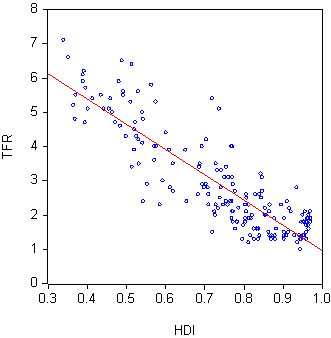
With rise in TFR, Human development index decreases. Higher the TFR, higher need of aid. 

- Child Mortality : It is the death of children under 5 years of age per 1000 live births. Higher child mortality indicates that the country might need aid to uplift its healthcare. 


An increase in the above parameters means that the country lacks basic amenties and the living conditions are not so good. Hence they may be in need of aid. However, the countries which have low child mortality, low total fertility and low inflation are not in need of external aid. So the countries with low values i.e 0.01% of this features can be capped. 

In [245]:
child_mort1 = census['child_mort'].quantile(0.01)
census['child_mort'][census['child_mort'] < child_mort1] = child_mort1

imports1 = census['imports'].quantile(0.01)
census['imports'][census['imports'] < imports1] = imports1

inflation1 = census['inflation'].quantile(0.01)
census['inflation'][census['inflation'] < inflation1] = inflation1

total_fer1 = census['total_fer'].quantile(0.01)
census['total_fer'][census['total_fer'] < total_fer1] = total_fer1

In [246]:
## Checking the range of numerical variables after capping of outliers

census.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,56086.606886,16857.550898,7.798194,70.442515,2.948601,12756.826347
std,40.327869,11415.308590,1790.845342,7509.337267,17957.012855,10.553699,8.755566,1.513108,17430.208938
min,2.800000,1.076920,12.821200,55371.390000,609.000000,-2.348800,32.100000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,55371.390000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,55371.390000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,55371.390000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,149100.000000,84374.000000,104.000000,80.400000,7.490000,79088.000000


**Ranges of parameters after treatment of outliers**

1. Child mortality ranges from 2.8 to 208. 
2. exports range from 1.07 to 64794.26. 
3. health expenditure ranges from 78 to 8410
4. imports range from 55371 to 149100
5. income ranges from 609 to 84374
6. inflation ranges from -2.34 to 104
7. life expectancy ranges from 32 years to 80 years 
8. Total fertility ranges from 1.24 to 7.49
9. GDPP ranges from 231 to 79088. 


<a id = 'univariate_analysis'></a>
### 3.2 Univariate analysis

In [247]:
def univar(para):
    plt.figure(figsize = (15,3))
    plt.title('Boxplot of '+ para)
    print(sns.boxplot(x = census[para], data = census))

AxesSubplot(0.125,0.125;0.775x0.755)


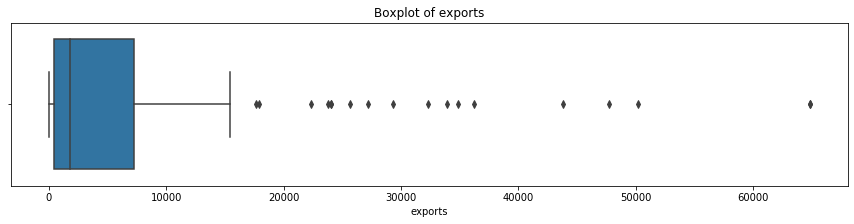

In [248]:
## checking the feature Exports 
univar('exports')
plt.show()

There are a lot of countries beyond the 75th percentile of exports. Median is around 2000. 

AxesSubplot(0.125,0.125;0.775x0.755)


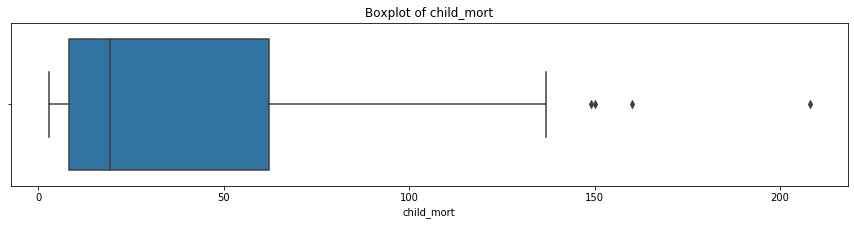

In [249]:
## Checking the parameters 'Child Mortality'
univar('child_mort')
plt.show()

Child mortality ranges from 2 to 208 with median at  20. 

AxesSubplot(0.125,0.125;0.775x0.755)


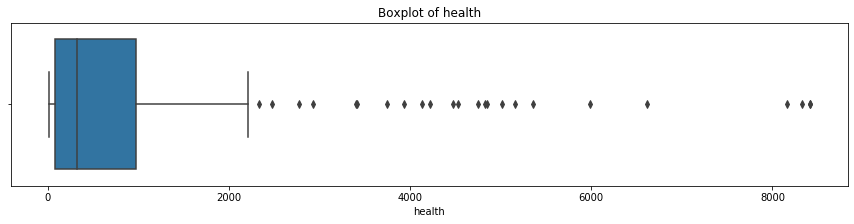

In [250]:
## checking the parameter : health 
univar('health')
plt.show()

Health expenditure goes beyond 8000. 

AxesSubplot(0.125,0.125;0.775x0.755)


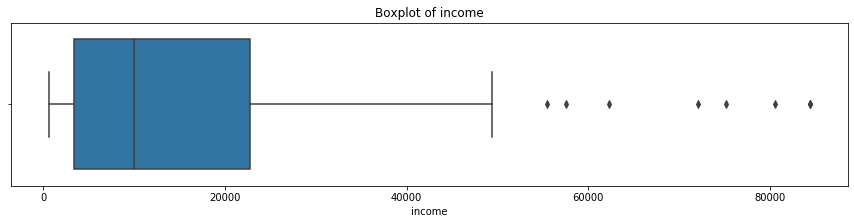

In [251]:
## checking the parameter 'Income'
univar('income')
plt.show()

Income ranges goes beyond 80000

AxesSubplot(0.125,0.125;0.775x0.755)


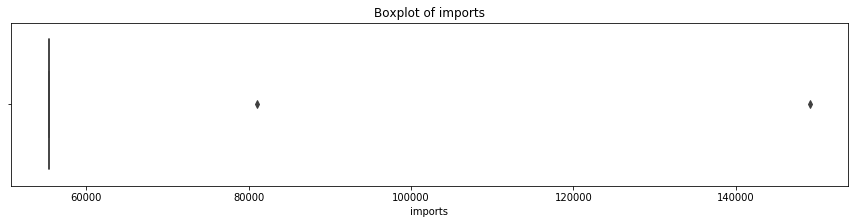

In [252]:
## Checking the parameter : Imports 
univar('imports')
plt.show()

Imports range from 0 to beyond 140000.

AxesSubplot(0.125,0.125;0.775x0.755)


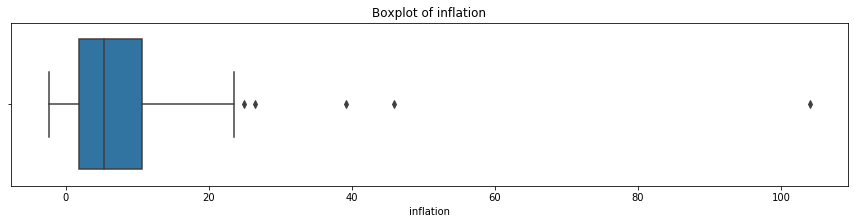

In [253]:
## Checking the parameter : Inflation 
univar('inflation')
plt.show()

Inflation ranges beyond 100. 

AxesSubplot(0.125,0.125;0.775x0.755)


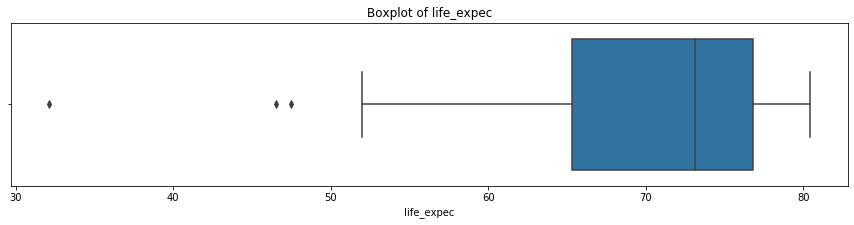

In [254]:
## Checking the parameter : Life expectancy
univar('life_expec')
plt.show()

Life expectancy ranges from 30 to 80. 

AxesSubplot(0.125,0.125;0.775x0.755)


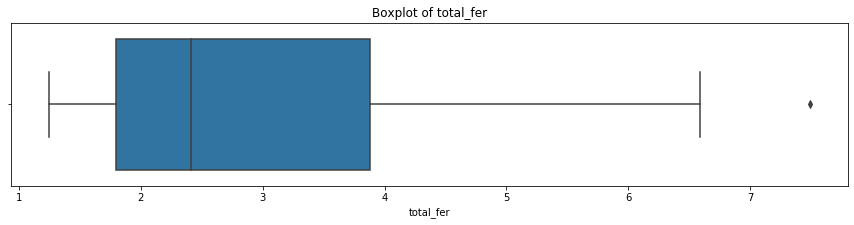

In [255]:
## Checking the parameter : Total fertility
univar('total_fer')
plt.show()

Fertility rates range from 1 to 6.8 with median at 2.5

AxesSubplot(0.125,0.125;0.775x0.755)


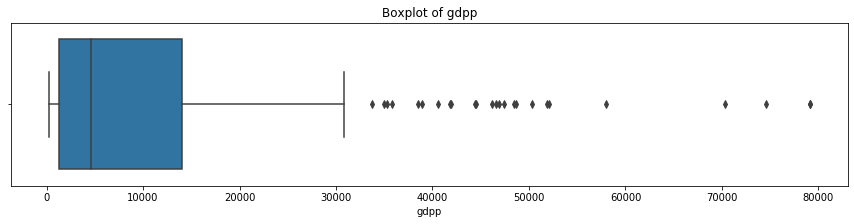

In [256]:
## Checking the parameter GDPP
univar('gdpp')
plt.show()

GDPP 75th percentile is at 30000 and ranges upto 80000. 

<a id = 'bivariate_analysis'></a>
### 3.3 Bivariate Analysis

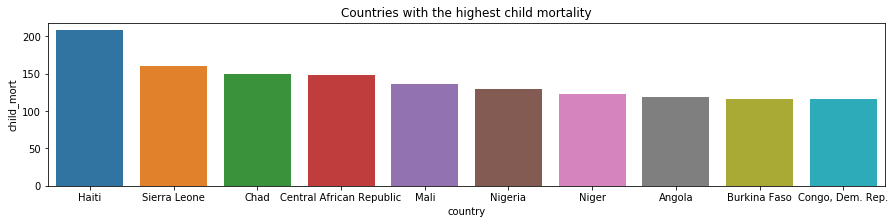

In [257]:
## Checking for 10 countries with highest child mortality 

plt.figure(figsize = (15,3))
child = census.sort_values(by = 'child_mort', ascending = False ).head(10)
plt.title('Countries with the highest child mortality')
sns.barplot(y = 'child_mort', x = 'country', data = child)
plt.show()

Haiti has the highest child mortality of 200. 

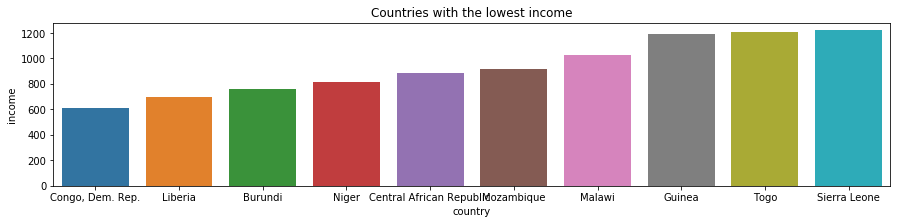

In [258]:
## Checking for top 10 countries with lowest income

plt.figure(figsize = (15,3))
income = census.sort_values(by = 'income', ascending = True).head(10)
plt.title('Countries with the lowest income')
sns.barplot(y = 'income', x = 'country', data = income)
plt.show()

Congo has the lowest income. 

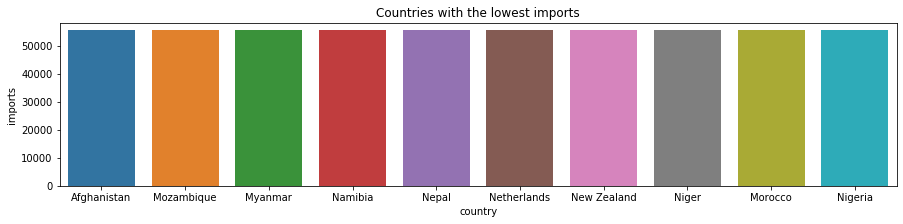

In [259]:
## Countries with lowest income 

plt.figure(figsize = (15,3))
imports = census.sort_values(by = 'imports', ascending = True).head(10)
plt.title('Countries with the lowest imports')
sns.barplot(y = 'imports', x = 'country', data = imports)
plt.show()


Afganistan has the lowest amount of imports. 

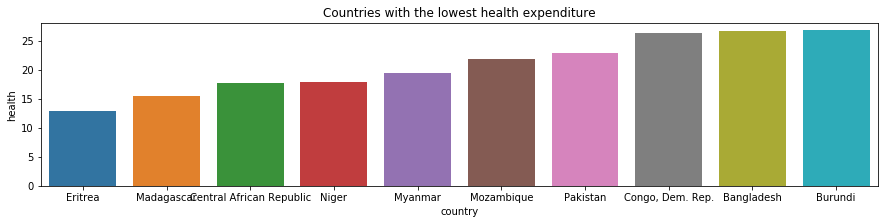

In [260]:
### Countries with lowest health expenditure 

plt.figure(figsize = (15,3))
health = census.sort_values(by = 'health', ascending = True).head(10)
plt.title('Countries with the lowest health expenditure')
sns.barplot(y = 'health', x = 'country', data = health)
plt.show()

Eritrea spend the lowest in health. 

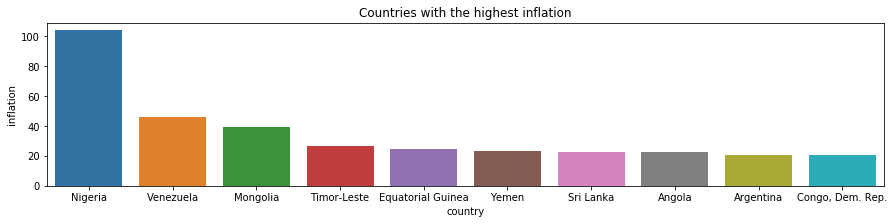

In [261]:
## checking with highest inflation

plt.figure(figsize = (15,3))
inflation = census.sort_values(by = 'inflation', ascending = False ).head(10)
plt.title('Countries with the highest inflation')
sns.barplot(y = 'inflation', x = 'country', data = inflation)
plt.show()


Nigeria has the highest inflation. 

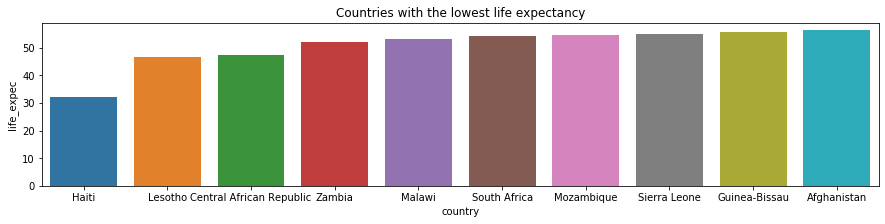

In [262]:
## Countries with lowest life expectancy 

plt.figure(figsize = (15,3))
life = census.sort_values(by = 'life_expec', ascending = True).head(10)
plt.title('Countries with the lowest life expectancy')
sns.barplot(y = 'life_expec', x = 'country', data = life)
plt.show()

Haiti has the lowest life expectancy. 

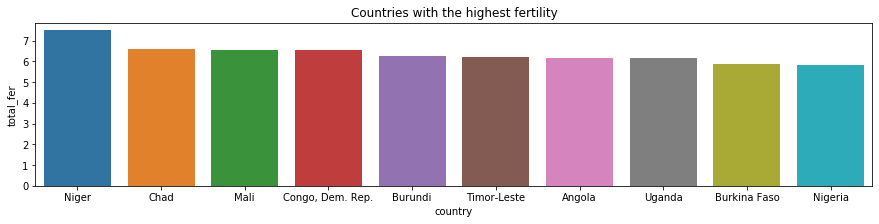

In [263]:
### Countries with highest fertility rates 

plt.figure(figsize = (15,3))
fer = census.sort_values(by = 'total_fer', ascending = False).head(10)
plt.title('Countries with the highest fertility')
sns.barplot(y = 'total_fer', x = 'country', data = fer)
plt.show()

Niger has the highest fertility. 

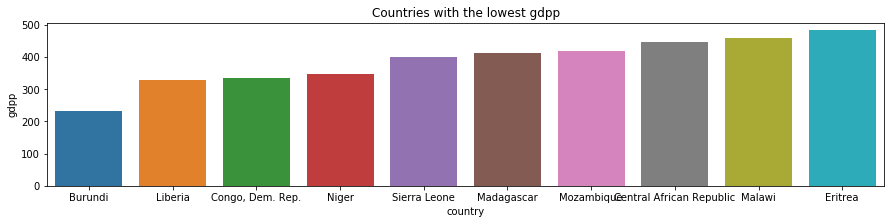

In [264]:
## Countries with lowest GDPP

plt.figure(figsize = (15,3))
gd = census.sort_values(by = 'gdpp', ascending = True).head(10)
plt.title('Countries with the lowest gdpp')
sns.barplot(y = 'gdpp', x = 'country', data = gd)
plt.show()

Burundi has the lowest GDPP. 

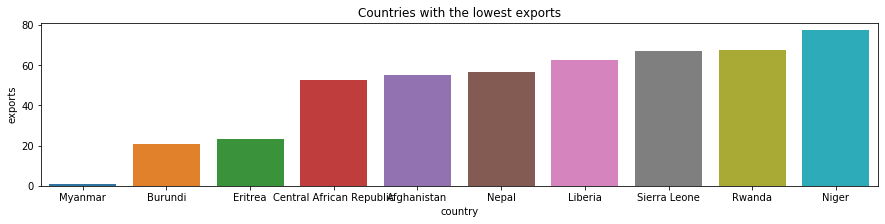

In [265]:
### Countries with lowest exports 

plt.figure(figsize = (15,3))
exports = census.sort_values(by = 'exports', ascending = True).head(10)
plt.title('Countries with the lowest exports')
sns.barplot(y = 'exports', x = 'country', data = exports)
plt.show()

Myanmar exports the lowest. 

<a id = 'Checking_for_correlation'></a>
### 3.4 Checking for Correlation

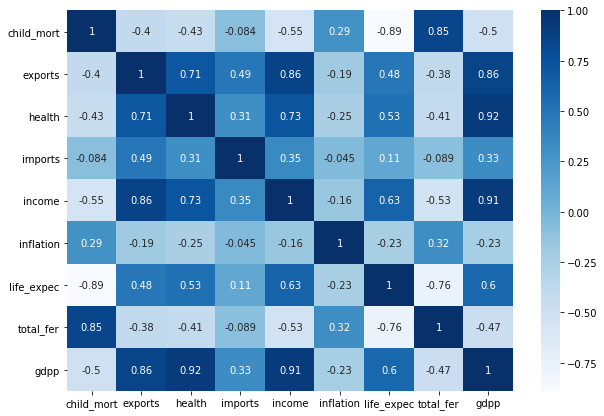

In [266]:
## Plotting a heatmap to check for correlation between the parameters. 

plt.figure(figsize = (10,7))
sns.heatmap(census.corr(),annot = True, cmap = 'Blues')

**Observations from the above heatmap**

- Child Mortality and income are negatively correlated. Negative coefficient of 0.55
- Child Mortality and life expectancy are negatively correlated. Negative coefficient of 0.89 
- Child Mortality and GDPP are negatively correlated. Negative correlation of 0.5
- Child Mortality and Total fertility are positively correlated with a coefficient of 0.85
- Income and total fertility are negatively correlated. Coefficient of -0.53
- life expectancy and total fertility are negatively correlated. Coefficient of -0.76
- GDPP and income have strong positive correlation of 0.91
- GDPP has strong correlation with health, exports and is negatively correlated to total fertility, inflation and child mortality. 
- Life expectancy and income, health and exports are positively correlated.  

<a id = 'data_preparation'></a>
## 4. Data Preparation

<a id = 'hopkins_statistics'></a>
### 4.1 Hopkins statistics 

In [267]:
## Hopkins statistics is used to determine if there are any patterns in the given dataframe. 
## A value of above 65-70 is considered as a good hopkins and the dataset can be clustered. 

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [268]:
census_country = census.drop('country', axis =1)
hopkins(census_country)

0.8765106694878864

Hopkins score on several iterations is above 0.85. The dataset is suitable for clustering. 

<a id = 'scaling'></a>
### 4.2 Scaling

In [269]:
scaler = StandardScaler() 
#fit_transform
census_scaled = scaler.fit_transform(census_country)
census_scaled = pd.DataFrame(census_scaled)
census_scaled.columns = census_country.columns
census_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-7.977650e-18,8.177092e-17,2.260334e-17,-1.837020e-15,-2.592736e-17,8.310053e-17,6.169383e-16,5.451394e-17,8.044131e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.822172e-01,-5.743864e-01,-5.832538e-01,-9.553012e-02,-9.075796e-01,-9.643549e-01,-4.392387e+00,-1.130475e+00,-7.207887e-01
25%,-7.466684e-01,-5.351931e-01,-5.464489e-01,-9.553012e-02,-7.541989e-01,-5.691089e-01,-5.891089e-01,-7.646981e-01,-6.575476e-01
50%,-4.718403e-01,-4.183061e-01,-4.101544e-01,-9.553012e-02,-3.852698e-01,-2.288711e-01,3.044324e-01,-3.570275e-01,-4.659254e-01
75%,5.926524e-01,6.500132e-02,-4.327510e-02,-9.553012e-02,3.319216e-01,2.805352e-01,7.282917e-01,6.174048e-01,7.441465e-02
max,4.221379e+00,5.118675e+00,4.119980e+00,1.242362e+01,3.771201e+00,9.142873e+00,1.140695e+00,3.010398e+00,3.816975e+00


<a id = 'clustering'></a>
## 5. Clustering 

<a id = 'kmeans_clustering'></a>
## 5.1 K-means Clustering 

In k-means clustering algorithm, we need to determine the number of clusters i.e. k beforehand. This is usually done using two processes. 
1. Elbow curve method
2. Silhouette method

#### Elbow-curve method to determine clusters

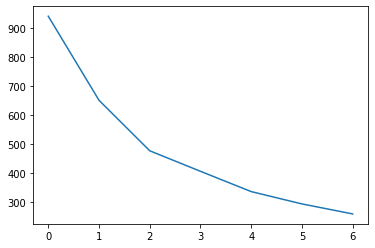

In [270]:
## Elbow curve i.e. sum of squared distances 
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters: 
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)  
    kmeans.fit(census_scaled)
    
    ssd.append(kmeans.inertia_)

#plot the ssd for each n_clusters  
plt.plot(ssd)


There is no clear dip. Lets check silhouette score. 

#### Silhouette score to determine clusters

In [271]:
## silhouette analysis
silhouette = []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    ##initialise k-means 
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(census_scaled)
    
    cluster_labels = kmeans.labels_ 
    
    ##silhouette score 
    
    silhouette_avg = silhouette_score(census_scaled, cluster_labels)
    
    print('for n_clusters={0}, the silhouette score is {1}'. format(num_clusters, silhouette_avg))
    silhouette.append(silhouette_avg)
    
    

for n_clusters=2, the silhouette score is 0.4576207894083295
for n_clusters=3, the silhouette score is 0.4222467520832994
for n_clusters=4, the silhouette score is 0.42743353408129686
for n_clusters=5, the silhouette score is 0.43131606676892914
for n_clusters=6, the silhouette score is 0.396519101286319
for n_clusters=7, the silhouette score is 0.30975097461258927
for n_clusters=8, the silhouette score is 0.30705557478545026


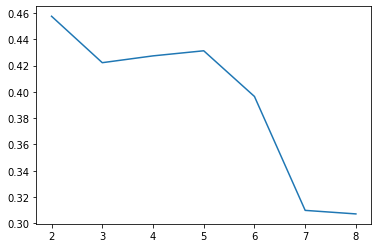

In [272]:
plt.plot(range_n_clusters, silhouette)

Since there is a clear dip at 5, let's take no.of clusters as 5. 
It seems fair from the business point of view too. 
2-3 clusters would be too broad. 
Developed and developing countries with no serious issues may get clustered together.
4-5 Clusters will give us well-defined clusters based on the features.  


Let's check the labels for two values of k. 

#### For K = 5 

In [273]:
kmeans = KMeans(n_clusters = 5, random_state = 100)  
kmeans.fit(census_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [274]:
## determing the labels

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 4, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [275]:
census['cluster_id'] = kmeans.labels_ ##assigning labels as cluster ids to the dataframe

census.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,55371.39,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,55371.39,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,55371.39,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,55371.39,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,55371.39,19100.0,1.44,76.8,2.13,12200.0,0


In [276]:
census.cluster_id.value_counts() ## checking the count of each cluster id. 

0    88
2    47
1    30
4     1
3     1
Name: cluster_id, dtype: int64

There are 88 countries in cluster 0, 30 countries in cluster 1, 47 countries in cluster 2, 1 each in cluster 3 and 4.  

### For K = 6 

In [277]:
kmeans2 = KMeans(n_clusters = 6, random_state = 100)  
kmeans2.fit(census_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [278]:
kmeans2.labels_

array([1, 3, 3, 1, 3, 3, 3, 0, 4, 3, 0, 0, 3, 3, 3, 4, 3, 1, 3, 3, 3, 1,
       3, 0, 3, 1, 1, 3, 1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 0, 0,
       4, 3, 3, 3, 3, 1, 1, 3, 3, 0, 0, 1, 1, 3, 0, 1, 0, 3, 3, 1, 1, 3,
       1, 3, 0, 3, 3, 3, 3, 4, 0, 0, 3, 0, 3, 3, 1, 1, 0, 3, 1, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       4, 0, 1, 5, 4, 0, 1, 3, 3, 3, 3, 3, 0, 4, 3, 3, 1, 3, 0, 1, 3, 3,
       1, 4, 0, 0, 1, 1, 0, 0, 3, 3, 1, 3, 4, 4, 3, 1, 3, 1, 1, 3, 3, 3,
       3, 1, 3, 0, 0, 4, 3, 3, 3, 3, 3, 1, 1])

In [279]:
census['cluster_id2'] = kmeans2.labels_ ## assigning the labels derived from fitting the model to k=6 to cluster_id2

census.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
0,Afghanistan,90.2,55.30,41.9174,55371.39,1610.0,9.44,56.2,5.82,553.0,2,1
1,Albania,16.6,1145.20,267.8950,55371.39,9930.0,4.49,76.3,1.65,4090.0,0,3
2,Algeria,27.3,1712.64,185.9820,55371.39,12900.0,16.10,76.5,2.89,4460.0,0,3
3,Angola,119.0,2199.19,100.6050,55371.39,5900.0,22.40,60.1,6.16,3530.0,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,55371.39,19100.0,1.44,76.8,2.13,12200.0,0,3


In [280]:
census['cluster_id2'].value_counts()

3    81
1    46
0    27
4    11
5     1
2     1
Name: cluster_id2, dtype: int64

According to this model, 
81 countries belong to cluster 3, 46 countries belong to cluster 1, 27 countries belong to cluster 0, 11 countries belong to cluster 4, 1 country belongs to each cluster 2 and 5. 

In [281]:
census_scaled['c2'] = census['cluster_id2']

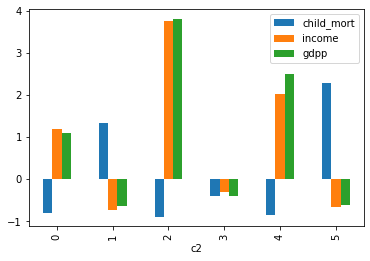

In [282]:
census_scaled.drop(['inflation', 'imports', 'exports', 'total_fer','life_expec','health'],axis = 1).groupby('c2').mean().plot(kind = 'bar')

There are too many clusters with the similar characteristics. Picking 5 clusters to create clusters with striking differences.
The following plots are plotted for 5 clusters. 

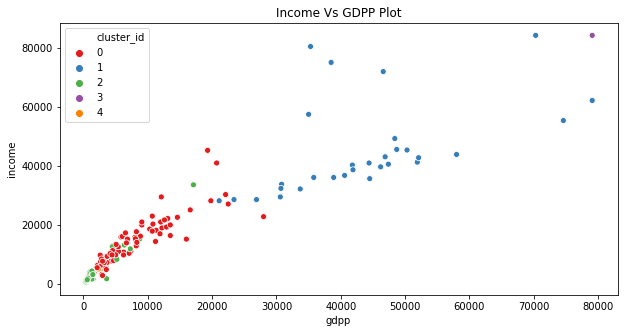

In [283]:
# Plot for income vs GDPP for 5 clusters
plt.figure(figsize = (10,5))
plt.title('Income Vs GDPP Plot')
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = census,  palette = 'Set1')
plt.savefig('Income Vs GDPP Plot')

Conclusions:
 - Cluster 3 has the highest GDPP and Income. 
 - Cluster 2 has the lowest GDPP and income. 

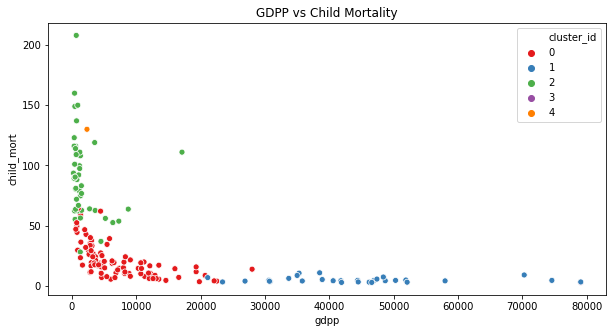

In [284]:
# Plot for GDPP VS CHILD MORTALITY for 5 clusters

plt.figure(figsize = (10,5))
plt.title('GDPP vs Child Mortality')
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = census,  palette = 'Set1')
plt.savefig('GDPP vs Child Mortality')

- Cluster 2 has the child mortality and low GDPP. 
- Cluster 1 has the highest GDPP and lowest child mortality. 

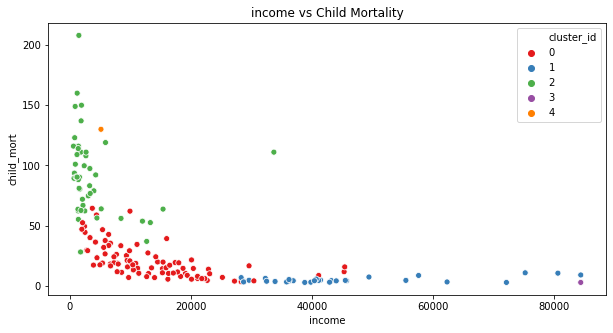

In [285]:
# Plot for Income vs Child mortality 

plt.figure(figsize = (10,5))
plt.title('income vs Child Mortality')
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = census,  palette = 'Set1')
plt.savefig('Income vs Child Mortality')

- Cluster 2 has the highest child mortality and the lowest income. 
- Cluster 1 has the lowest child mortality and highest income.  

**Cluster Profiling for 5 clusters** 

In [286]:
census_scaled['cluster_id'] = kmeans.labels_
census_scaled['country'] = census['country']
census_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,c2,cluster_id,country
0,1.291537,-0.569622,-0.566958,-0.09553,-0.851668,0.156035,-1.631574,1.903390,-0.702259,1,2,Afghanistan
1,-0.538993,-0.473858,-0.440393,-0.09553,-0.386946,-0.314406,0.671013,-0.860816,-0.498726,3,0,Albania
2,-0.272870,-0.424000,-0.486271,-0.09553,-0.221053,0.788991,0.693925,-0.038846,-0.477434,3,0,Algeria
3,2.007831,-0.381249,-0.534088,-0.09553,-0.612045,1.387733,-1.184803,2.128769,-0.530950,1,2,Angola
4,-0.695682,-0.086742,-0.178410,-0.09553,0.125254,-0.604273,0.728292,-0.542634,-0.032042,3,0,Antigua and Barbuda


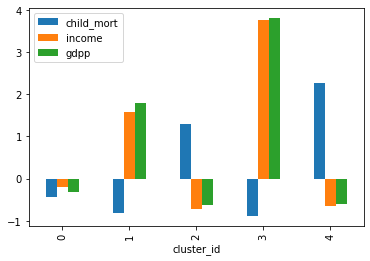

In [287]:
census_scaled.drop(['inflation', 'imports', 'exports', 'total_fer','life_expec','health','c2'],axis = 1).groupby('cluster_id').mean().plot(kind = 'bar')

    1) Cluster 0 has low child mortality, low income, low gdpp
    2) Cluster 1 has low child mortality, high income and high gdpp
    3) Cluster 2 has low income, high child mortality, low gdpp. 
    4) Cluster 3 has high income, high gdpp, low child mortality. 
    5) Cluster 4 has high child mortality, low income, and low GDPP. This is the cluster that need immediate aid followed by cluster 2.

**Countries in Cluster 0**

In [288]:
cluster0 = census[census['cluster_id']== 0]
print(cluster0['country'].tolist())

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'South Korea', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand', 'Tonga',

These countries have low child mortality, low income and low gdpp. But they are better off than those in cluster 4 and 2

**Countries in Cluster 1**

In [289]:
cluster1 = census[census['cluster_id']== 1]
print(cluster1['country'].tolist())

['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Singapore', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', 'United Kingdom', 'United States']


These countries have low child mortality, high income and high GDPP. They are not in need of aid.

**Countries in Cluster 2**

In [290]:
cluster2 = census[census['cluster_id']== 2]
print(cluster2['country'].tolist())

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


These countries have high child mortality, low GDPP and low income. This cluster is better off than cluster 4. However, they also may need aid. 

**Countries in Cluster 3**

In [291]:
cluster3 = census[census['cluster_id']== 3]
print(cluster3['country'].tolist())

['Luxembourg']


Luxembourg in cluster 3 has high GDPP, high income and low child mortality. 

**Countries in cluster 4**

In [292]:
cluster3 = census[census['cluster_id']== 4]
print(cluster3['country'].tolist())

['Nigeria']


Nigeria has very child mortality, low income and low GDPP. It needs immediate aid. 

**Countries in need of immediate aid**

In [293]:
census[census['cluster_id'] == 4].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
113,Nigeria,130.0,589.49,118.131,55371.39,5150.0,104.0,60.5,5.84,2330.0,4,5


In [294]:
census[census['cluster_id'] == 2].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2
66,Haiti,208.0,101.286,45.7442,55371.39,1500.0,5.45,32.1,3.33,662.0,2,1
132,Sierra Leone,160.0,67.032,52.2690,55371.39,1220.0,17.20,55.0,5.20,399.0,2,1
32,Chad,150.0,330.096,40.6341,55371.39,1930.0,6.39,56.5,6.59,897.0,2,1
31,Central African Republic,149.0,52.628,17.7508,55371.39,888.0,2.01,47.5,5.21,446.0,2,1
97,Mali,137.0,161.424,35.2584,55371.39,1870.0,4.37,59.5,6.55,708.0,2,1


The countries that need immediate aid
- Nigeria
- Haiti
- Sierra leone
- Chad
- Central African republic
- Mali

<a id = 'hierarchical_clustering'></a>
### 5.2 Hierarchical Clustering

In [295]:
from scipy.cluster.hierarchy import linkage ##scipy is scientific python
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree

In [296]:
census_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,c2,cluster_id
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,167.000000,167.000000
mean,-7.977650e-18,8.177092e-17,2.260334e-17,-1.837020e-15,-2.592736e-17,8.310053e-17,6.169383e-16,5.451394e-17,8.044131e-17,2.035928,0.784431
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.316678,0.919139
min,-8.822172e-01,-5.743864e-01,-5.832538e-01,-9.553012e-02,-9.075796e-01,-9.643549e-01,-4.392387e+00,-1.130475e+00,-7.207887e-01,0.000000,0.000000
25%,-7.466684e-01,-5.351931e-01,-5.464489e-01,-9.553012e-02,-7.541989e-01,-5.691089e-01,-5.891089e-01,-7.646981e-01,-6.575476e-01,1.000000,0.000000
50%,-4.718403e-01,-4.183061e-01,-4.101544e-01,-9.553012e-02,-3.852698e-01,-2.288711e-01,3.044324e-01,-3.570275e-01,-4.659254e-01,3.000000,0.000000
75%,5.926524e-01,6.500132e-02,-4.327510e-02,-9.553012e-02,3.319216e-01,2.805352e-01,7.282917e-01,6.174048e-01,7.441465e-02,3.000000,2.000000
max,4.221379e+00,5.118675e+00,4.119980e+00,1.242362e+01,3.771201e+00,9.142873e+00,1.140695e+00,3.010398e+00,3.816975e+00,5.000000,4.000000


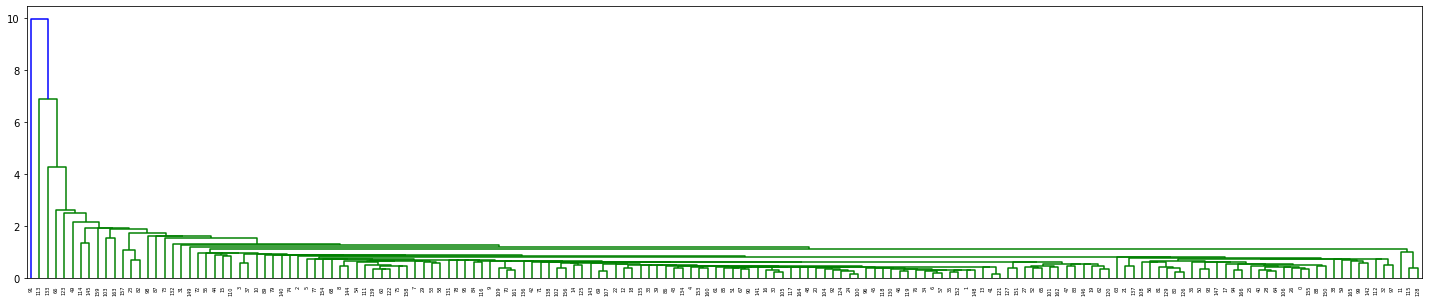

<Figure size 432x288 with 0 Axes>

In [297]:
## Checking the dendrogram for single linkage 

new = census_scaled.drop(['country','cluster_id', 'c2'], axis =1).copy()

plt.figure(figsize = (25,5))
mergings = linkage(new, method = 'single', metric = 'euclidean')
dendrogram(mergings)
plt.show()
plt.savefig('single_Linkage')

At 6 if we cut the tree, we get around 3 clusters. 

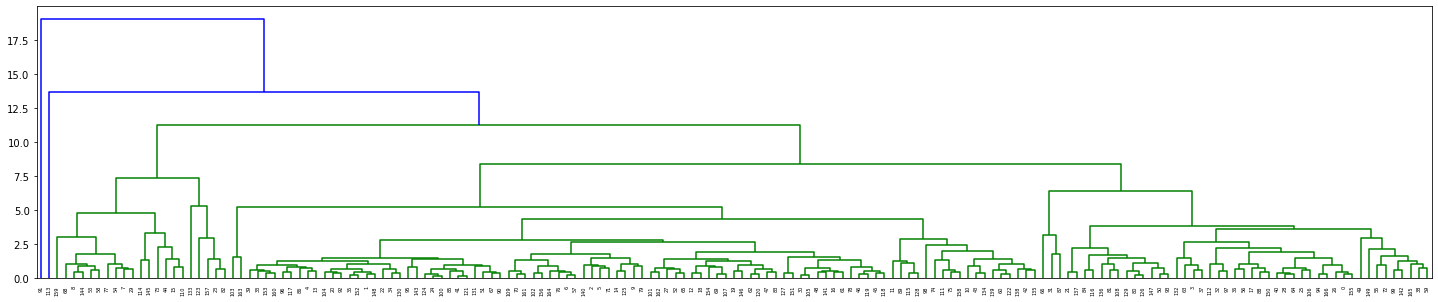

<Figure size 432x288 with 0 Axes>

In [298]:
## checking the dendrogram for complete linkage 

plt.figure(figsize = (25,5))
complete_mergings = linkage(new, method = 'complete', metric = 'euclidean')
dendrogram(complete_mergings)
plt.show()
plt.savefig('complete_Linkage')

##height of the dendrogram gives the no. of clusters. 

At 8, we get 6 clusters. 

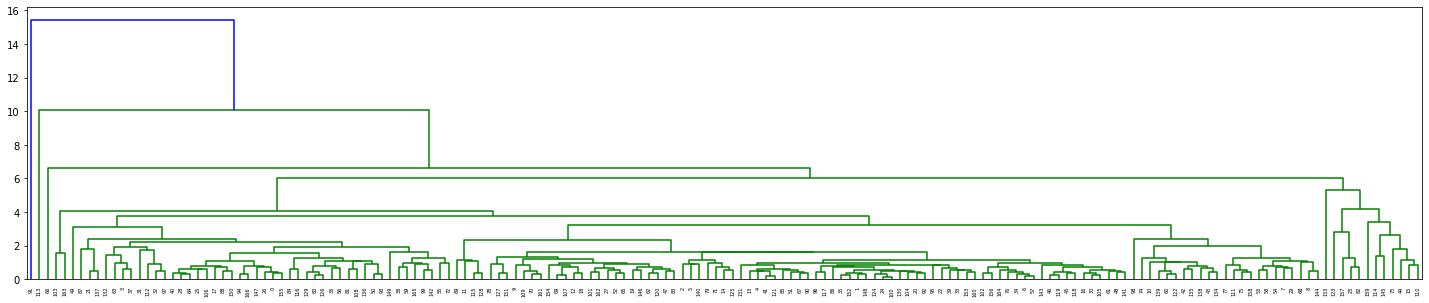

<Figure size 432x288 with 0 Axes>

In [299]:
## checking the dendrogram for average linkage 

plt.figure(figsize = (25,5))
avg_mergings = linkage(new, method = 'average', metric = 'euclidean')
dendrogram(avg_mergings)
plt.show()
plt.savefig('avg_Linkage')

##height of the dendrogram gives the no. of clusters. 

At 6, we get 5 clusters.

From complete linkage, we get 6 clusters. Let's go ahead with 6 clusters. 

In [300]:
 cut_tree(complete_mergings, n_clusters = 6)

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [3],
       [1],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [2],
       [2],
       [0],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [0],
       [0],
       [3],
    

In [301]:
### generating labels by cutting the dendrogram 

labels = cut_tree(complete_mergings, n_clusters = 6).reshape(-1, )
labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 1, 1, 4, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 5, 2, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [302]:
## generating labels through hierarchical clustering using complete linkage and agglomerative approach 
census['hac_complete_labels'] = labels
census.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2,hac_complete_labels
0,Afghanistan,90.2,55.30,41.9174,55371.39,1610.0,9.44,56.2,5.82,553.0,2,1,0
1,Albania,16.6,1145.20,267.8950,55371.39,9930.0,4.49,76.3,1.65,4090.0,0,3,1
2,Algeria,27.3,1712.64,185.9820,55371.39,12900.0,16.10,76.5,2.89,4460.0,0,3,1
3,Angola,119.0,2199.19,100.6050,55371.39,5900.0,22.40,60.1,6.16,3530.0,2,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,55371.39,19100.0,1.44,76.8,2.13,12200.0,0,3,1


In [303]:
## checking the count in each cluster

census['hac_complete_labels'].value_counts()

1    97
0    47
2    16
3     5
5     1
4     1
Name: hac_complete_labels, dtype: int64

There are 97 countries in cluster 1, 47 in cluster 0, 16 in cluster 2, 5 in cluster 3 and 1 each in cluster 5 and 4

**Cluster Profiling using hierarchical clustering**

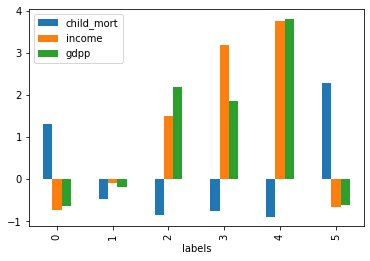

In [304]:
new['labels'] = labels ##using scaled dataset for profiling 
new.drop(['inflation', 'imports', 'exports', 'total_fer','life_expec','health'],axis = 1).groupby('labels').mean().plot(kind = 'bar')


- Cluster 5 has high child mortality, low income, low gdpp. 
- Cluster 0 has high child mortality, low income and low GDPP. 

These 2 clusters need immediate aid. 

- Cluster 1 has low child mortality but has low income and low gdpp. 

Following cluster 2 and 4, these countries also need aid. 


**Countries in Cluster 0**

In [305]:
cluster0 = census[census['hac_complete_labels']== 0]
print(cluster0['country'].tolist())

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


**Countries in Cluster 1**

In [306]:
cluster1 = census[census['hac_complete_labels']== 1]
print(cluster1['country'].tolist())

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'New Zealand', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sri Lank

**Countries in Cluster 2**

In [307]:
cluster2 = census[census['hac_complete_labels']== 2]
print(cluster2['country'].tolist())

['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Japan', 'Netherlands', 'Norway', 'Sweden', 'Switzerland', 'United States']


**Countries in Cluster 3**

In [308]:
cluster3 = census[census['hac_complete_labels']== 3]
print(cluster3['country'].tolist())

['Brunei', 'Kuwait', 'Qatar', 'Singapore', 'United Arab Emirates']


**Countries in Cluster 4**

In [309]:
cluster4 = census[census['hac_complete_labels']== 4]
print(cluster4['country'].tolist())

['Luxembourg']


**Countries in Cluster 5**

In [310]:
cluster5 = census[census['hac_complete_labels']== 5]
print(cluster5['country'].tolist())

['Nigeria']


#### Plots

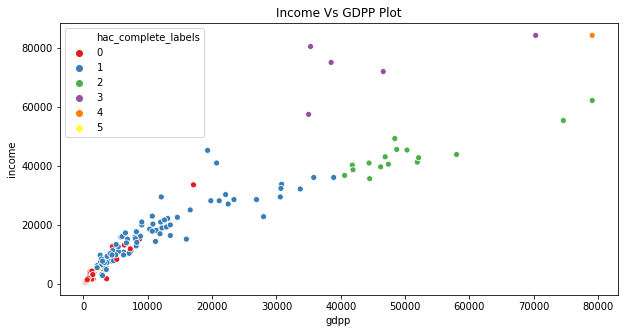

In [311]:
# Plot of Income vs GDPP using hierarchical clusters

plt.figure(figsize = (10,5))
plt.title('Income Vs GDPP Plot')
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'hac_complete_labels', data = census,  palette = 'Set1')

- Cluster 2 has high GDPP and high income. 
- cluster 4 has the highest GDPP and high income. 
- Cluster 0 has the lowest income and GDPP.

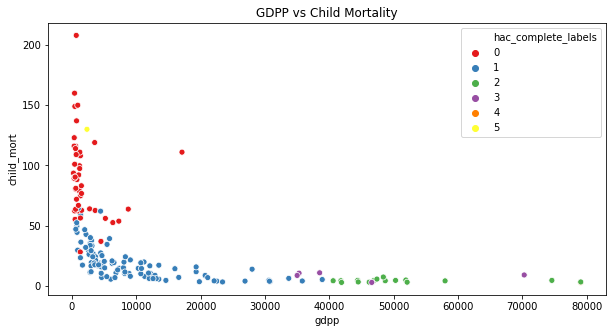

In [312]:
# Plot for GDPP vs child mortality 

plt.figure(figsize = (10,5))
plt.title('GDPP vs Child Mortality')
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'hac_complete_labels', data = census,  palette = 'Set1')

- Cluster 0 has the highest child mortality and lowest GDPP 
- Cluster 5 also has high child mortality. 

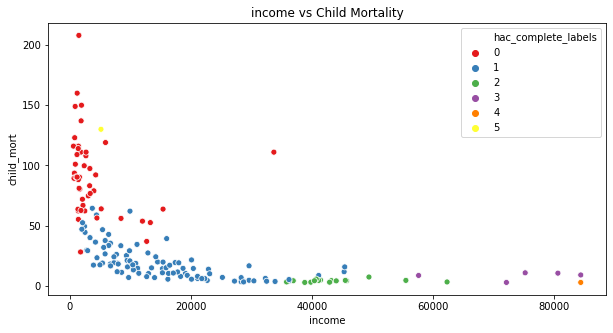

In [313]:
# Plot for Income vs Child mortality 

plt.figure(figsize = (10,5))
plt.title('income vs Child Mortality')
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'hac_complete_labels', data = census,  palette = 'Set1')

- Cluster 0 has high child mortality and low income.
- cluster 5 has high child mortality and low income.

**Countries in need of immediate aid using hierarchical clustering**

In [314]:
census[census['hac_complete_labels'] == 5].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2,hac_complete_labels
113,Nigeria,130.0,589.49,118.131,55371.39,5150.0,104.0,60.5,5.84,2330.0,4,5,5


In [315]:
census[census['hac_complete_labels'] == 0].sort_values(by = ['child_mort','gdpp','income'], ascending = [False, True, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id2,hac_complete_labels
66,Haiti,208.0,101.286,45.7442,55371.39,1500.0,5.45,32.1,3.33,662.0,2,1,0
132,Sierra Leone,160.0,67.032,52.2690,55371.39,1220.0,17.20,55.0,5.20,399.0,2,1,0
32,Chad,150.0,330.096,40.6341,55371.39,1930.0,6.39,56.5,6.59,897.0,2,1,0
31,Central African Republic,149.0,52.628,17.7508,55371.39,888.0,2.01,47.5,5.21,446.0,2,1,0
97,Mali,137.0,161.424,35.2584,55371.39,1870.0,4.37,59.5,6.55,708.0,2,1,0


**Countries in need of immediate aid**

- Nigeria
- Haiti
- Sierra leone
- Chad
- Central African Republic. 

<a id = 'results'></a>
## 6. Results 

**Results from K-means :**

Countries in need of immediate aid:

1. Nigeria
2. Haiti
3. Sierra leone
4. Chad
5. Central African Republic

**Results from hierarchical clustering :**

Countries in need of immediate aid:

1. Nigeria
2. Haiti
3. Sierra leone
4. Chad
5. Central African Republic